In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
#import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
#from classy import Class
%matplotlib inline
#import s1 
import ST
from PIL import Image

from matplotlib.image import pil_to_array
from scipy.integrate import trapz


In [2]:
nside = 256
lmax = 3*nside-1
ell = np.arange (lmax+1)
res_rad = hp.nside2resol (nside , arcmin = False)
res_arcmin = hp.nside2resol (nside , arcmin = True)
print ("Pixel area: %.2f square degrees" % hp.nside2pixarea(nside, degrees=True))

Pixel area: 0.05 square degrees


In [3]:
grayscale_pil_image = Image.open("/Users/arefe/Downloads/shadedrelief.jpg").convert("L")
image_array = pil_to_array(grayscale_pil_image)


In [4]:
pix.shape

NameError: name 'pix' is not defined

In [ ]:
plt.imshow(image_array)

In [5]:
theta_arr = np.linspace(0, np.pi, num=image_array.shape[0])[:, None]
phi_arr = np.linspace(np.pi, -np.pi, num=image_array.shape[1])

In [6]:
pix = hp.ang2pix(nside, theta_arr, phi_arr)
map_earth = np.zeros(hp.nside2npix(nside), dtype="float")
map_earth[pix] = image_array
#map_earth = map_earth/np.sum(np.abs(map_earth))



In [7]:
phi_arr.shape

(10800,)

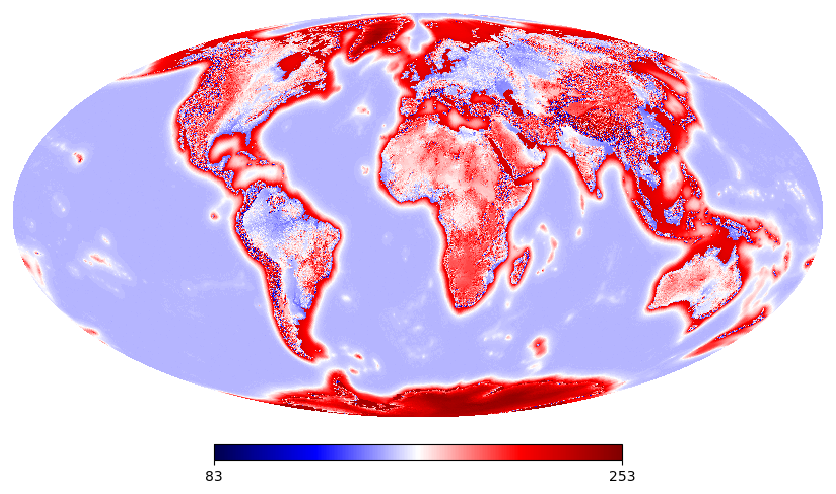

In [8]:
hp.mollview(map_earth, title="" , cmap="seismic")

In [11]:
jmax = 9

In [12]:
theta_bin = 100000
morlet_l_arr = ST.morlet_arr(res_rad , jmax , lmax , theta_bin)

In [13]:
s1_earth , i1_earth = ST.compS1(map_earth , morlet_l_arr, jmax, nside)

0
1
2
3
4
5
6
7
8


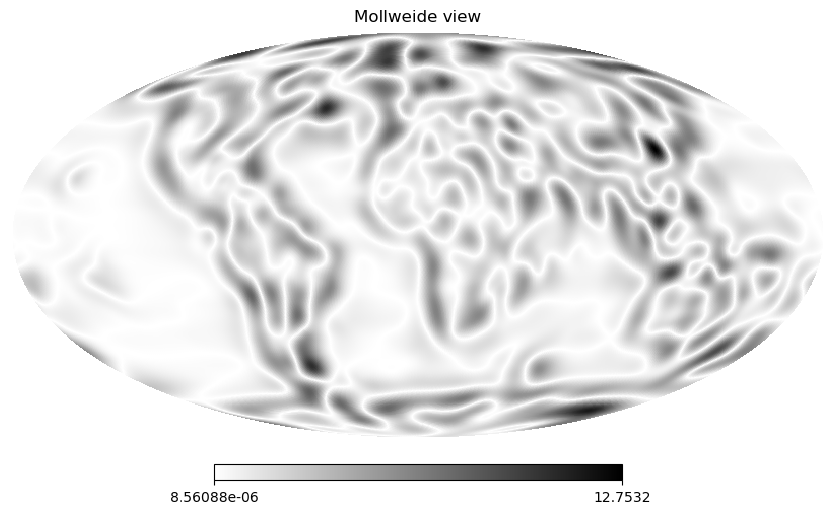

In [44]:
hp.mollview(i1_earth[5], cmap="binary")

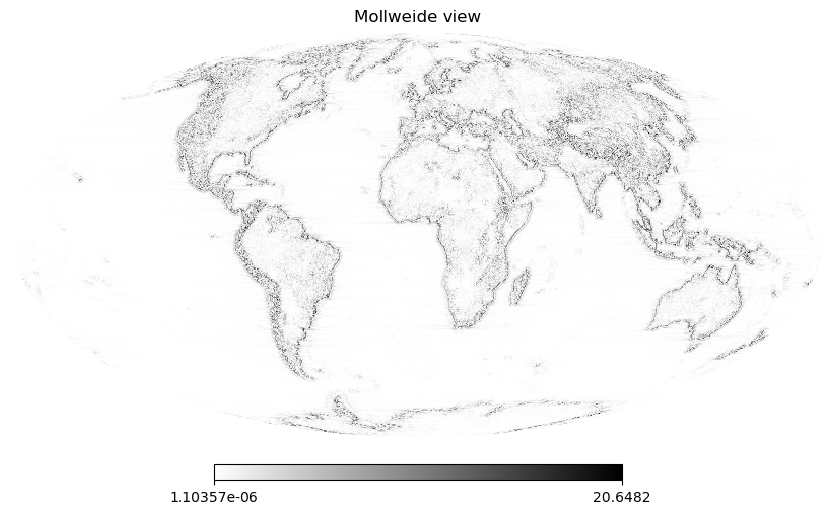

In [47]:
hp.mollview(i1_earth[1], cmap="binary")

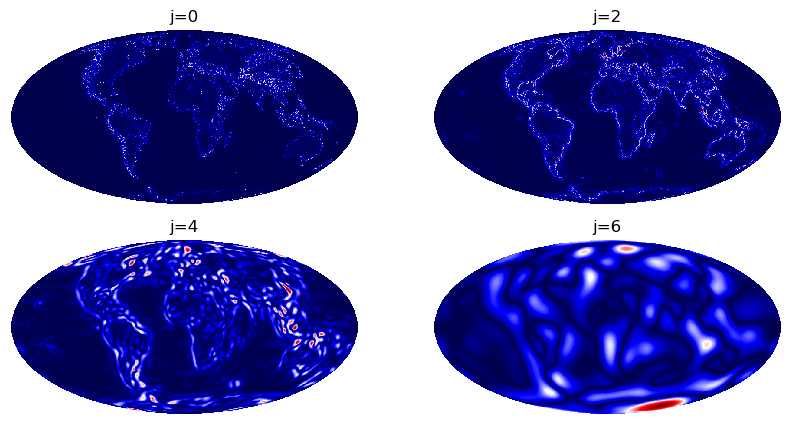

In [48]:
fig , ax = plt.subplots (2,2,sharey=True,squeeze=True,figsize=(10,5))
l = 0
for i in range (2):
    for j in range(2):
        plt.axes(ax[i,j])
        ax[i,j] = hp.mollview(i1_earth[l], title="j=%d"%l ,cmap="seismic", cbar=False,  hold=True)
        #ax[i,j].title("")
        l+=2

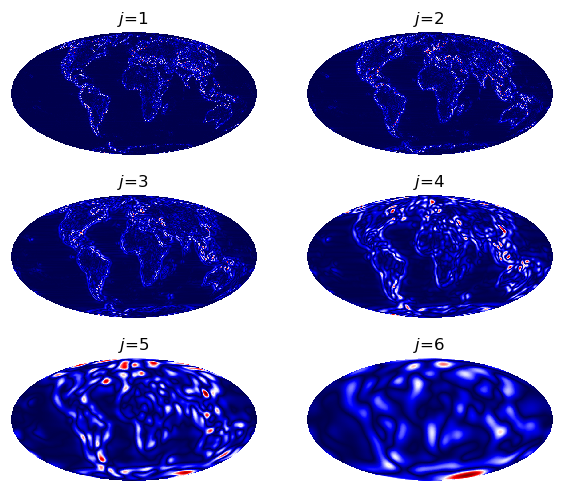

In [17]:
fig , ax = plt.subplots (3,2,sharey=True,squeeze=True,figsize=(7,6))
l = 1
for i in range (3):
    for j in range(2):
        plt.axes(ax[i,j])
        ax[i,j] = hp.mollview(i1_earth[l], title=r"$j$=%d"%l , cbar=False,  hold=True , cmap= "seismic")
        #ax[i,j].title("")
        l+=1
plt.savefig("earth_i1.pdf", bbox_inches = 'tight', pad_inches=0.1)

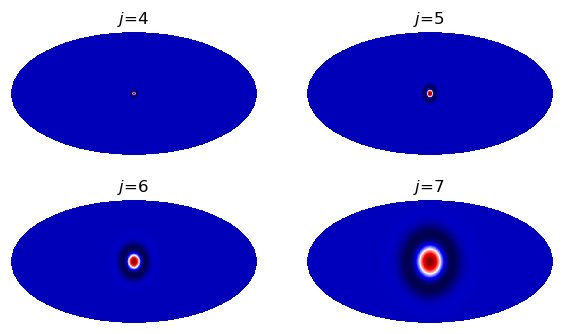

In [16]:
fig , ax = plt.subplots (2,2,sharey=True,squeeze=True,figsize=(7,4))
l = 4
pix = np.arange(hp.nside2npix(nside))
theta , phi = hp.pix2ang(nside, pix)
for i in range (2):
    for j in range(2):
        sigma1 = (0.8*res_rad*2**l)
        freq1=(3.0*np.pi) /(4.0*res_rad*2**l)
        mor = ST.morlet(freq1, sigma1, theta, lmax)
        map1 = np.zeros(hp.nside2npix(nside), dtype="float")
        map1[pix] = np.real(mor)
        plt.axes(ax[i,j])
        ax[i,j] = hp.mollview(map1,  rot = [0,90], title=r"$j$=%d"%l , cbar=False,  hold=True , cmap="seismic")
        #ax[i,j].title("")
        l+=1
    
    
    
    
    
plt.savefig("Morlet_prof.pdf", bbox_inches = 'tight', pad_inches=0.1)
    

In [13]:
pix

array([     0,      0,      0, ..., 786431, 786431, 786428])